# Intuitional Description

Maximum likelihood estimation identifies the parameter values that maximize the probability of observing your actual data, essentially asking "which model settings would make what we actually saw most likely to occur?"

# Graphical Summary

![fig](./cartoons/maximum_likelihood_estimation.svg)

# Key Formula

In statistics, maximum likelihood estimation (MLE) is a method of estimating the parameters of an assumed probability distribution, given some observed data. This is achieved by maximizing the likelihood function ($L(\theta|\text{D}) = P(\theta|\text{D})$) so that, under the assumed statistical model, the observed data is most probable. 

The goal of maximum likelihood estimation is to find the values of the model parameters (e.g., $\theta$) that maximize the likelihood function over the parameter space (e.g., $\Theta$), that is:
$$
\hat{\theta} = \underset{\theta \in \Theta}{\operatorname{argmax}} L(\theta|D) = \underset{\theta \in \Theta}{\operatorname{argmax}} P(D|\theta)
$$

# Technical Details

## Work with Log-Likelihood

In practice, it is often convenient to work with the natural logarithm of the likelihood function, called the log-likelihood:

$$\ell (\theta \,;\mathbf{y})=\ln {\mathcal{L}}_{n}(\theta \,;\mathbf{y})~.$$

Since the logarithm is a monotonic function, the maximum of $\ell (\theta \,;\mathbf{y})$ occurs at the same value of $\theta$ as does the maximum of ${\mathcal{L}}_{n}~.$.

## Likelihood equation
If $\ell (\theta \,;\mathbf{y})$ is differentiable in $\Theta$, sufficient conditions for the occurrence of a maximum (or a minimum) are

$$
\frac{\partial \ell}{\partial \theta}=0
$$

known as the likelihood equations.

## IID data

If the data are independent and identically distributed, then we have

$${\widehat{\ell\,}}(\theta \,;D)=\sum_{i=1}^{n}\ln f(d_{i}\mid \theta),$$

this being the sample analogue of the expected log-likelihood 

$$\ell(\theta)=\operatorname{\mathbb{E}}[\,\ln f(d_{i}\mid \theta)\,],$$

where this expectation is taken with respect to the true density.

# Example

Here we use the first genetic variant to show how to calculate the maximum likelihood estimate of the frequency of a genetic variant, using the first genetic variant as an example.

### Obtain the MLE for frequency from the figure

In [ ]:
# Clear the environment
rm(list = ls())

# Define genotypes for 5 individuals at 3 variants
# These represent actual alleles at each position
# For example, Individual 1 has genotypes: CC, CT, AT
genotypes <- c(
    "CC", "CT", "AT", # Individual 1
    "TT", "TT", "AA", # Individual 2
    "CT", "CT", "AA", # Individual 3
    "CC", "TT", "AA", # Individual 4
    "CC", "CC", "TT" # Individual 5
)
# Reshape into a matrix
N <- 5 # number of individuals
M <- 3 # number of variants
geno_matrix <- matrix(genotypes, nrow = N, ncol = M, byrow = TRUE)
rownames(geno_matrix) <- paste("Individual", 1:N)
colnames(geno_matrix) <- paste("Variant", 1:M)

alt_alleles <- c("T", "C", "T")
ref_alleles <- c("C", "T", "A")

geno_matrix

,Variant 1,Variant 2,Variant 3
Individual 1,CC,CT,AT
Individual 2,TT,TT,AA
Individual 3,CT,CT,AA
Individual 4,CC,TT,AA
Individual 5,CC,CC,TT


In the first variant we have observed the genotype data for five individuals, CC, TT, CT, CC and CC (which is our data $\text{D}$). We want to estimate the frequency fo the alternative `T` for this variant. Specifically, for each $q\in[0,1]$ let $M_q$ denote the model that the true frequency of the `T` allele is $q$. Then, given our observation that 3 of 10 alleles (2 alleles per individual because human is dipliod) carried allele `T` at marker 1, the likelihood for model $M_q$ is, by the previous definition,
$$
L(M_q)=\Pr(\text{D}|M_q)=(1-q)^2 * q^2 * 2q(1-q) * (1-q)^2 * (1-q)^2 = 2q^3(1−q)^7
$$


When computing likelihoods for parametric models, we usually dispense with the model notation and simply use the parameter value to denote the model. So instead of referring to the likelihood for $M_q$  we just say the “likelihood for $q$”, and write $L(q)$. So the likelihood for $q$ is given by

$$
L(q)= 2q^3(1−q)^7
$$

We could plot the likelihood function as follows:

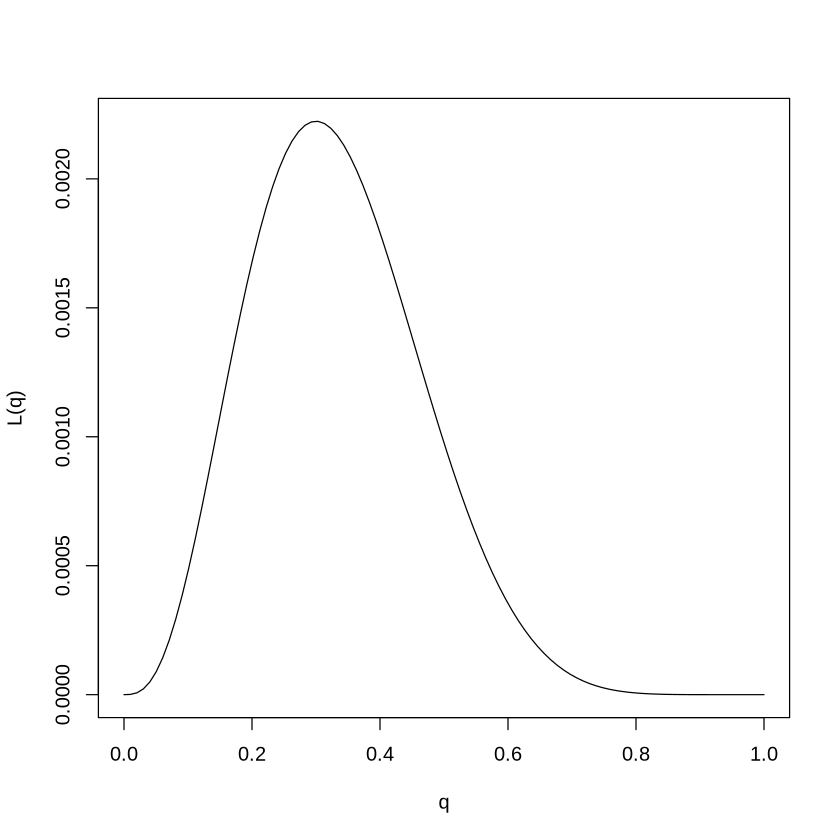

In [ ]:
q <- seq(0, 1, length = 100)
L <- function(q) {
    q^3 * (1 - q)^7
}
plot(q, L(q), ylab = "L(q)", xlab = "q", type = "l")

Since the value of $q$ that maximizes the likelihood function is referred to as the “maximum likelihood estimate”, and usually denoted $\hat{q}$. That is
$$
\hat{q} =\underset{\theta \in \Theta}{\operatorname{argmax}} L(q)
$$

Provided the data are sufficiently informative, and the number of parameters is not too large, maximum likelihood estimates tend to be sensible. In this case we can see that the maximum likelihood estimate is $q=0.3$, which also corresponds to our intuition.

### From likelihood function to log-likelihood function

Just as it can often be convenient to work with the log-likelihood ratio, it can be convenient to work with the log-likelihood function, usually denoted as $l(q)$.  Here is the log-likelihood function.

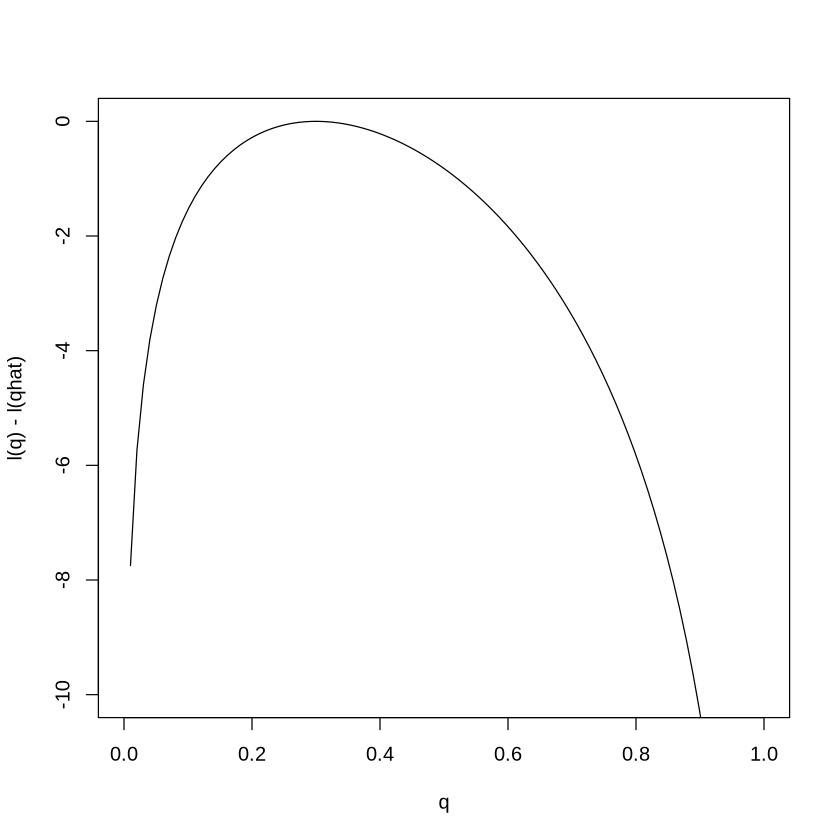

In [ ]:
q <- seq(0, 1, length = 100)
l <- function(q) {
    3 * log(q) + 7 * log(1 - q)
}
plot(q, l(q) - l(0.3), ylab = "l(q) - l(qhat)", xlab = "q", type = "l", ylim = c(-10, 0))

Changes in the log-likelihood function are referred to as “log-likelihood units”. For example the difference in the support for `q=0.3` and `q=0.35` is `l(0.3)-l(0.35) = 0.5630377` log-likelihood units. Again, remember that it is differences in `l` that matter, not the actual values.

### Obtain the MLE of frequency analytically

In this simple case we can calculate $\hat{q}$ analytically as well, but keep in mind that in most of the cases, it's impossible to get the explicit formula of $\hat{\theta}$ of a parameter $\theta$ directly.

1. Take the natural logarithm of the likelihood function (for computational convenience):
   $$\ln L(q) = \ln(2) + 3\ln(q) + 7\ln(1-q)$$

2. Find the critical point by taking the derivative and setting it to zero:
   $$\frac{d\ln L(q)}{dq} = \frac{3}{q} - \frac{7}{1-q} = 0$$

3. Solve for $q$:
   $$\frac{3}{q} = \frac{7}{1-q}$$
   $$3(1-q) = 7q$$
   $$3 - 3q = 7q$$
   $$3 = 10q$$
   $$q = \frac{3}{10} = 0.3$$

4. Verify it's a maximum by checking that the second derivative is negative:
   $$\frac{d^2\ln L(q)}{dq^2} = -\frac{3}{q^2} - \frac{7}{(1-q)^2} < 0$$
   
   This is always negative for $q \in (0,1)$, confirming we have a maximum.